In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install "torch==1.4" "torchvision==0.5.0"

In [ ]:
import os
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from pathlib import Path

import keras
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalMaxPooling2D
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping, ReduceLROnPlateau
from keras import backend as K 


import torch
from fastai import *
from fastai.vision import *
from fastai.callbacks import *

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix

# Defining Labels 

Importing test set and corresponding labels


In [ ]:
test = '/content/drive/MyDrive/Data_new/Hybrid_1'
test_list=os.listdir(test)
print(test_list)

['0', '3', '1', '2', 'models']


In [ ]:
test = '/content/drive/MyDrive/Data_new/Hybrid_1_test'
test_list=os.listdir(test)
for f in test_list:
  f_name=os.path.join(test, f) 
  num = int(f.replace(".png",""))
  

  if f==os.listdir(test)[0]:
    if num<484: 
      l=np.ones((1,1))*0
      continue
    elif num<1815: 
      l = np.ones((1,1))*2
      continue 
    elif num<3267: 
      l = np.ones((1,1))*1
      continue 
    else: 
      l = np.ones((1,1))*3
      continue 
  
  if num<484: 
    m = np.ones((1,1))*0
    l = np.concatenate((l, m))
  elif num<1815: 
    m = np.ones((1,1))*2
    l = np.concatenate((l, m))
  elif num<3267: 
    m = np.ones((1,1))*1
    l = np.concatenate((l, m))
  else: 
    m = np.ones((1,1))*3
    l = np.concatenate((l, m))
  #print(num, m)
print(l.shape)

(942, 1)


Importing training labels


In [ ]:
source = '/content/drive/MyDrive/Data_new/Hybrid_1'
source_0=os.listdir(source+"/0")
source_2=os.listdir(source+"/2")
source_1=os.listdir(source+"/1")
source_3=os.listdir(source+"/3")


n_label = np.ones((len(source_0),1))*0
i_label = np.ones((len(source_2),1))*2
b_label = np.ones((len(source_1),1))*1
o_label = np.ones((len(source_3),1))*3

In [ ]:
label = np.concatenate((n_label, i_label, b_label, o_label))
print(label.shape)

(3777, 1)


Binarizing both labels

In [ ]:
label_encoder  = LabelBinarizer()
U_L  = label_encoder.fit_transform(label)
T_L = label_encoder.fit_transform(l)

# Training hybrid signal 1 using DenseNet121


/usr/local/lib/python3.7/dist-packages/fastai/data_block.py:541: UserWarning: You are labelling your items with CategoryList.
Your train set contained the following unknown labels, the corresponding items have been discarded.
EMD_2_test, EMD_1_test, EMD5_test, hybrid(inner only), Samples...
  if getattr(ds, 'warn', False): warn(ds.warn)
/usr/local/lib/python3.7/dist-packages/fastai/data_block.py:541: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
EMD_2_test, EMD_1_test, EMD5_test, EMD3_test, VMD_2_test...
  if getattr(ds, 'warn', False): warn(ds.warn)


['0', '1', '2', '3']


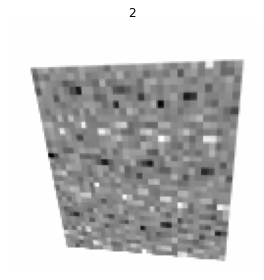

In [ ]:
tfms = get_transforms(do_flip=False, 
                      flip_vert=True,
                      max_rotate= 20,
                      max_zoom=.1,
                      max_lighting=0.3, max_warp=0.2)

np.random.seed(42)
data_bigger = ImageDataBunch.from_folder('/content/drive/MyDrive/Data_new', train="Hybrid_1", test='Hybrid_1_test', 
                                         valid_pct=0.2,
                                         ds_tfms=tfms, #get_transforms(),
                                         size=128, classes=['0', '1', '2', '3'],
                                         num_workers=3).normalize(imagenet_stats)
print(data_bigger.classes)

data_bigger.show_batch(rows=1)

#Transfer Learning: DenseNet121

In [ ]:
learn = cnn_learner(data_bigger, models.densenet121, metrics=[error_rate, accuracy], wd=0.1)
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 64, 64]         9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 64, 64]         128        True      
______________________________________________________________________
ReLU                 [64, 64, 64]         0          False     
______________________________________________________________________
MaxPool2d            [64, 32, 32]         0          False     
______________________________________________________________________
BatchNorm2d          [64, 32, 32]         128        True      
______________________________________________________________________
ReLU                 [64, 32, 32]         0          False     
______________________________________________________________________
Conv2d               [128, 32, 32]        8,192      False     
___________________________________________________

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.262138,0.084072,0.034691,0.965309,16:37
1,0.113807,0.010454,0.003248,0.996752,05:36
2,0.062597,0.002348,0.000443,0.999557,05:32
3,0.039397,0.003936,0.000886,0.999114,05:33
4,0.031573,0.000582,0.000000,1.000000,05:33
5,0.010344,0.000318,0.000000,1.000000,05:34
6,0.009617,0.000079,0.000000,1.000000,05:32
7,0.004220,0.000020,0.000000,1.000000,05:31
8,0.003444,0.000007,0.000000,1.000000,05:32
9,0.001448,0.000007,0.000000,1.000000,05:30


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ff898506dd0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 138, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7ff898506dd0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.7/multiprocessing/pro

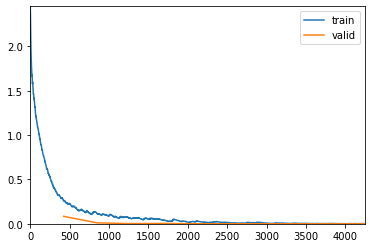

Better model found at epoch 0 with valid_loss value: 0.08407188951969147.
Better model found at epoch 1 with valid_loss value: 0.010453966446220875.
Better model found at epoch 2 with valid_loss value: 0.0023483079858124256.
Better model found at epoch 4 with valid_loss value: 0.0005817557103000581.
Better model found at epoch 5 with valid_loss value: 0.00031756600947119296.
Better model found at epoch 6 with valid_loss value: 7.877111784182489e-05.
Better model found at epoch 7 with valid_loss value: 2.048238820862025e-05.
Better model found at epoch 8 with valid_loss value: 7.202535925898701e-06.
Better model found at epoch 9 with valid_loss value: 7.0417599999927916e-06.


In [ ]:
learn.unfreeze()
learn.fit_one_cycle(10, max_lr=slice(5e-5, 5e-3),callbacks=[ShowGraph(learn),SaveModelCallback(learn)]) #50

#Test accuracy of final model

In [ ]:
from sklearn import metrics as met
preds = learn.get_preds()
# # Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(np.array(preds[0]), axis=1)
# # Convert validation observations to one hot vectors
Y_true = np.array(preds[1]) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(np.array(preds[1]), np.argmax(np.array(preds[0]), axis=1)) 
# plot the confusion matrix
print(confusion_mtx)
target_names = ['normal', 'ball', 'inner','outer6']
# Argmax function is deconverting from hot encoding to simple one
print (classification_report(Y_pred_classes,Y_true, target_names = target_names))

# cm = met.confusion_matrix(np.array(preds[1]), np.argmax(np.array(preds[0]), axis=1))
# met.plot_confusion_matrix(cm, 
#                       normalize    = False)
# met.plot_confusion_matrix(cm, 
#                       normalize    = True)


[[ 674    0    0    0]
 [   0 2130    0    0]
 [   0    0 1909    0]
 [   0    0    0 2061]]
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00       674
        ball       1.00      1.00      1.00      2130
       inner       1.00      1.00      1.00      1909
      outer6       1.00      1.00      1.00      2061

    accuracy                           1.00      6774
   macro avg       1.00      1.00      1.00      6774
weighted avg       1.00      1.00      1.00      6774



In [ ]:
from sklearn import metrics as met
preds = learn.get_preds(ds_type= DatasetType.Test)

# # Converting predictions classes to one hot vectors
Y_pred_classes = np.argmax(np.array(preds[0]), axis=1)
print(Y_pred_classes)
# # Converting validation observations to one hot vectors
Y_true = np.argmax(T_L,axis=1)
# computing the confusion matrix
confusion_mtx = confusion_matrix(Y_true, np.argmax(np.array(preds[0]), axis=1)) 
print(confusion_mtx)
target_names = ['normal', 'ball', 'inner','outer6']
# Argmax function is deconverting from hot encoding to simple one
print (classification_report(Y_pred_classes,Y_true, target_names = target_names))



[0 0 0 0 ... 3 3 3 3]
[[ 96   0   0   0]
 [  0 266   0   0]
 [  0   0 290   0]
 [  0   0   0 290]]
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00        96
        ball       1.00      1.00      1.00       266
       inner       1.00      1.00      1.00       290
      outer6       1.00      1.00      1.00       290

    accuracy                           1.00       942
   macro avg       1.00      1.00      1.00       942
weighted avg       1.00      1.00      1.00       942



#Same model: VMD Performance

In [ ]:
test = '/content/drive/MyDrive/Data_new/VMD_1'
test_list=os.listdir(test)
print(test_list)

['0', '1', '2', '3']


In [ ]:
test = '/content/drive/MyDrive/Data_new/VMD_1_test'
test_list=os.listdir(test)
for f in test_list:
  f_name=os.path.join(test, f) 
  num = int(f.replace(".png",""))
  

  if f==os.listdir(test)[0]:
    if num<484: 
      l=np.ones((1,1))*0
      continue
    elif num<1815: 
      l = np.ones((1,1))*2
      continue 
    elif num<3267: 
      l = np.ones((1,1))*1
      continue 
    else: 
      l = np.ones((1,1))*3
      continue 
  
  if num<484: 
    m = np.ones((1,1))*0
    l = np.concatenate((l, m))
  elif num<1815: 
    m = np.ones((1,1))*2
    l = np.concatenate((l, m))
  elif num<3267: 
    m = np.ones((1,1))*1
    l = np.concatenate((l, m))
  else: 
    m = np.ones((1,1))*3
    l = np.concatenate((l, m))
  #print(num, m)
print(l.shape)

(942, 1)


In [ ]:
source = '/content/drive/MyDrive/Data_new/VMD_1'
source_0=os.listdir(source+"/0")
source_2=os.listdir(source+"/2")
source_1=os.listdir(source+"/1")
source_3=os.listdir(source+"/3")


n_label = np.ones((len(source_0),1))*0
i_label = np.ones((len(source_2),1))*2
b_label = np.ones((len(source_1),1))*1
o_label = np.ones((len(source_3),1))*3

In [ ]:
label = np.concatenate((n_label, i_label, b_label, o_label))
print(label.shape)

label_encoder  = LabelBinarizer()
U_L  = label_encoder.fit_transform(label)
T_L = label_encoder.fit_transform(l)

(3777, 1)


In [ ]:
tfms = get_transforms(do_flip=False, 
                      flip_vert=True,
                      max_rotate= 20,
                      max_zoom=.1,
                      max_lighting=0.3, max_warp=0.2)

np.random.seed(42)
data_bigger = ImageDataBunch.from_folder('/content/drive/MyDrive/Data_new', train="VMD_1", test='VMD_1_test', 
                                         valid_pct=0.2,
                                         ds_tfms=tfms, #get_transforms(),
                                         size=128, classes=['0', '1', '2', '3'],
                                         num_workers=3).normalize(imagenet_stats)

/usr/local/lib/python3.7/dist-packages/fastai/data_block.py:541: UserWarning: You are labelling your items with CategoryList.
Your train set contained the following unknown labels, the corresponding items have been discarded.
Original_test, Hybrid_2_test, VMD_2_test, EMD3_test, hybrid(inner only)...
  if getattr(ds, 'warn', False): warn(ds.warn)
/usr/local/lib/python3.7/dist-packages/fastai/data_block.py:541: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
Original_test, Hybrid_2_test, VMD_2_test, EMD3_test, hybrid(inner only)...
  if getattr(ds, 'warn', False): warn(ds.warn)
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.195953,0.091102,0.034187,0.965813,08:02
1,0.100781,0.016649,0.005148,0.994852,05:22
2,0.049509,0.001629,0.000264,0.999736,05:24
3,0.036650,0.000835,0.000264,0.999736,05:24
4,0.012892,0.000300,0.000000,1.000000,05:21
5,0.007801,0.000113,0.000000,1.000000,05:19
6,0.008039,0.000058,0.000000,1.000000,05:18
7,0.001725,0.000016,0.000000,1.000000,05:21
8,0.000716,0.000003,0.000000,1.000000,05:19
9,0.001133,0.000002,0.000000,1.000000,05:20


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


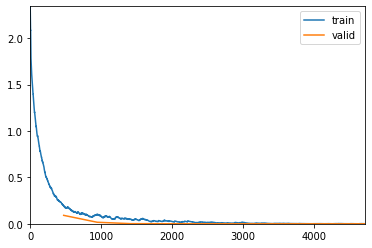

Better model found at epoch 0 with valid_loss value: 0.09110242128372192.


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Better model found at epoch 1 with valid_loss value: 0.01664932258427143.


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Better model found at epoch 2 with valid_loss value: 0.001629282720386982.


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Better model found at epoch 3 with valid_loss value: 0.0008347640978172421.


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Better model found at epoch 4 with valid_loss value: 0.0003004410827998072.


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Better model found at epoch 5 with valid_loss value: 0.00011309913679724559.


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Better model found at epoch 6 with valid_loss value: 5.786885958514176e-05.


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Better model found at epoch 7 with valid_loss value: 1.5680125216022134e-05.


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Better model found at epoch 8 with valid_loss value: 3.1779459277458955e-06.


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Better model found at epoch 9 with valid_loss value: 1.6450723023808678e-06.


In [ ]:
learn = cnn_learner(data_bigger, models.densenet121, metrics=[error_rate, accuracy], wd=0.1)
learn.unfreeze()
learn.fit_one_cycle(10, max_lr=slice(5e-5, 5e-3),callbacks=[ShowGraph(learn),SaveModelCallback(learn)]) #50

Test results

In [ ]:
preds = learn.get_preds(ds_type= DatasetType.Test)

# # Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(np.array(preds[0]), axis=1)
print(Y_pred_classes)
# # Convert validation observations to one hot vectors
Y_true = np.argmax(T_L,axis=1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, np.argmax(np.array(preds[0]), axis=1)) 
# plot the confusion matrix
print(confusion_mtx)
target_names = ['normal', 'ball', 'inner','outer6']
# Argmax function is deconverting from hot encoding to simple one
print (classification_report(Y_pred_classes,Y_true, target_names = target_names))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[0 0 0 0 ... 3 3 3 3]
[[ 96   0   0   0]
 [ 28 214  23   1]
 [  0   4 275  11]
 [ 20  11  33 226]]
              precision    recall  f1-score   support

      normal       1.00      0.67      0.80       144
        ball       0.80      0.93      0.86       229
       inner       0.95      0.83      0.89       331
      outer6       0.78      0.95      0.86       238

    accuracy                           0.86       942
   macro avg       0.88      0.85      0.85       942
weighted avg       0.88      0.86      0.86       942

